# Coursework 2: k-means clustering


# Task 1: Prepare two test datasets


## Task 1: Part 1: K-means clustering pen & paper Dataset:

I am comfortable with writing equation and explanations in markdown so I will finish the pen & paper part here.

### What is K-means clustering?
&emsp; &emsp; It is a technique used to group similar datapoints together. It creates 'K' clusters on datapoints of size n, $$K < n$$.

Suppose we have 9 2D points as below which are to be grouped into 3 clusters

$$A_1 = (2,9)$$
$$A_2 = (2,2)$$
$$A_3 = (8,4)$$
$$A_4 = (3,8)$$
$$A_5 = (7,5)$$
$$A_6 = (4,9)$$
$$A_7 = (9,4)$$
$$A_8 = (1,3)$$
$$A_9 = (2,3)$$

## Task 1: Part 2: Creating fresh dataset 

1. The dataset that I will create will have 200x2 dimensions. This is made possible with the use of sklearn.dataset.make_blobs. Read https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html for details.
2. The dataset is supposed to have 4 clusters.
3. The dataset has only 2 dimensions because I dont want to dive deep into clustering and dimension reduction concept for a simple task.


### Why is my small dataset suitable for k-means clustering? 
1. When small dataset implies low dimensions:
<br>&emsp;&emsp;K-means is literally finding k-centroids. Since centroids exist in euclidean geometry, the concept of distance when dimensions increase is lost. This is called the curse of dimensionality which render k-means useless in high dimensions. This issue can be solved using dimensionality reduction techniques on the dataset (which is overkill for this simple task).<br><br>
2. When small dataset implies less inputs:
<br>&emsp;&emsp; The time complexity for k-means is $O(n^2)$. The space complexity isnt going to be an issue unless the data is ginormous, since the notebook runs on a 12GB memory. I prefer the notebook to finish executing fast and also, I am satisfied with the size of data which anyway has 33% more datapoints than the recommended iris dataset. 


This answers why I chose 200x2 size of dataset

In [1]:
#I want to create my own dataset for k-means clustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

#creating dataset of clusters with only 2 dimensions for easier maths understanding
features, clusters = make_blobs(n_samples = 2000, 
                                n_features = 2, 
                                centers = 4,
                                cluster_std = 0.4,
                                shuffle = False,
                                random_state = 4)

#visualizing the created clustered dataset
#plt.scatter(features[:,0], features[:,1])
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
#plt.title('Clustered dataset created')
#plt.show()


## Task 2: Apply k-means clustering on paper

From Task 1: Part 1: 
<br>Since we know $k = 3$, we need to find 3 centroids for the above datapoints. These 3 centroids can be found by following below steps.

#### Step 1: Random initialization of 'K' centroids.
Here we randomly pick any 3 datapoints and assign them as our initial centroids. In our example case, let us consider the below 3 points as the initial centroids.
$$A_1, A_5, A_9$$

#### Step 2: Assignment of all the remaining points.
In this step, for all remaining points in the dataset, we will calculate its distance from all the assigned centroids. We shall use squared Euclidean distance to measure the distance since data is 2D.

<center><input type="image" src="eq S.svg"></center>

The above equation says, if a point $x_p$ is closest to the centroid $m_i$ than all other centroids $m_j$, then $x_p$ belongs to the subset $S_i$

$$ A_1 \in S_1$$ $$A_5 \in S_2$$ $$ A_9 \in S_3$$


Let us take the point $A_2$.
$$|A_2 - A_1| = \sqrt{(2-2)^2 + (2-9)^2}$$<br>
$$ = \sqrt{0 + (-7)^2}$$<br>
$$ = \sqrt{49}$$<br>
$$= 7 $$

$$|A_2 - A_5| = \sqrt{(2-7)^2 + (2-5)^2}$$<br>
$$= \sqrt{(-5)^2 + (-3)^2}$$<br>
$$ = \sqrt{25+9}$$<br>
$$ = \sqrt{34}$$<br>
$$ = 5.8$$

$$|A_2 - A_9| = \sqrt{(2-2)^2 + (2-3)^2}$$<br>
$$ = \sqrt{(-1)^2}$$<br>
$$ = \sqrt{1}$$<br>
$$ = 1$$


As we can observe, the point $A_2$ has the least squared Euclidean distance for the Centroid $A_9$. Hence, this point will belong to the subset $S_3$.

Let us take the point $A_3$.
$$|A_3 - A_1| = \sqrt{(8-2)^2 + (4-9)^2}$$<br>
$$ = \sqrt{(6)^2 + (-5)^2}$$<br>
$$ = \sqrt{36 + 25}$$<br>
$$= 7.81 $$

$$|A_3 - A_5| = \sqrt{(8-7)^2 + (4-5)^2}$$<br>
$$= \sqrt{(1)^2 + (-1)^2}$$<br>
$$ = \sqrt{2}$$<br>
$$ = 1.414$$

$$|A_3 - A_9| = \sqrt{(8-2)^2 + (4-3)^2}$$<br>
$$ = \sqrt{(6)^2 + 1^2}$$<br>
$$ = \sqrt{37}$$<br>
$$ = 6.09$$


As we can observe, the point $A_3$ has the least squared Euclidean distance for the Centroid $A_5$. Hence, this point will belong to the subset $S_2$.

Let us take the point $A_4$.
$$|A_4 - A_1| = \sqrt{(3-2)^2 + (8-9)^2}$$<br>
$$ = \sqrt{(1)^2 + (-1)^2}$$<br>
$$ = \sqrt{2}$$<br>
$$= 1.414 $$

$$|A_4 - A_5| = \sqrt{(3-7)^2 + (8-5)^2}$$<br>
$$= \sqrt{(-4)^2 + (-3)^2}$$<br>
$$ = \sqrt{25}$$<br>
$$ = 5$$

$$|A_4 - A_9| = \sqrt{(3-2)^2 + (8-3)^2}$$<br>
$$ = \sqrt{(1)^2 + 5^2}$$<br>
$$ = \sqrt{26}$$<br>
$$ = 5.09$$


As we can observe, the point $A_4$ has the least squared Euclidean distance for the Centroid $A_1$. Hence, this point will belong to the subset $S_1$.

Let us take the point $A_6$.
$$|A_6 - A_1| = \sqrt{(4-2)^2 + (9-9)^2}$$<br>
$$ = \sqrt{(2)^2 + (-0)^2}$$<br>
$$ = \sqrt{4}$$<br>
$$= 2 $$

$$|A_6 - A_5| = \sqrt{(4-7)^2 + (9-5)^2}$$<br>
$$= \sqrt{(3)^2 + (4)^2}$$<br>
$$ = \sqrt{25}$$<br>
$$ = 5$$

$$|A_6 - A_9| = \sqrt{(4-2)^2 + (9-3)^2}$$<br>
$$ = \sqrt{(2)^2 + 6^2}$$<br>
$$ = \sqrt{40}$$<br>
$$ = 6.32$$


As we can observe, the point $A_6$ has the least squared Euclidean distance for the Centroid $A_1$. Hence, this point will belong to the subset $S_2$.

Let us take the point $A_7$.
$$|A_7 - A_1| = \sqrt{(9-2)^2 + (4-9)^2}$$<br>
$$ = \sqrt{(7)^2 + (-5)^2}$$<br>
$$ = \sqrt{49 + 25}$$<br>
$$= 8.60 $$

$$|A_7 - A_5| = \sqrt{(9-7)^2 + (4-5)^2}$$<br>
$$= \sqrt{(2)^2 + (-1)^2}$$<br>
$$ = \sqrt{2+1}$$<br>
$$ = 1.73 $$

$$|A_7 - A_9| = \sqrt{(9-2)^2 + (4-3)^2}$$<br>
$$ = \sqrt{(7)^2 + 1^2}$$<br>
$$ = \sqrt{50}$$<br>
$$ = 7.07 $$


As we can observe, the point $A_7$ has the least squared Euclidean distance for the Centroid $A_5$. Hence, this point will belong to the subset $S_2$.

Let us take the point $A_8$.
$$|A_8 - A_1| = \sqrt{(1-2)^2 + (3-9)^2}$$<br>
$$ = \sqrt{(-1)^2 + (-6)^2}$$<br>
$$ = \sqrt{37}$$<br>
$$= 6.08 $$

$$|A_8 - A_5| = \sqrt{(1-7)^2 + (3-5)^2}$$<br>
$$= \sqrt{(-6)^2 + (-2)^2}$$<br>
$$ = \sqrt{36+4}$$<br>
$$ = 6.32$$

$$|A_8 - A_9| = \sqrt{(1-2)^2 + (3-3)^2}$$<br>
$$ = \sqrt{1}$$<br>
$$ = 1$$


As we can observe, the point $A_8$ has the least squared Euclidean distance for the Centroid $A_9$. Hence, this point will belong to the subset $S_3$.

We already know 
$$ A_1 \in S_1 $$
$$ A_5 \in S_2$$
$$ A_9 \in S_3$$

After calculating the distance of each point to the initial centroids, the result is

$$A_1, A_4, A_6 \in S_1$$
$$A_3, A_5, A_7 \in S_2$$
$$A_2, A_8, A_9 \in S_3$$

#### Step 3:

We have each point $x_i$ assigned to set $S_j$. Now, we recalculate and update all centroids $C_j$

$$\large C_j = \sum\limits_{i=0}^n\frac{ x_i}{|S_j|}$$

where $|S_j|$ is the number of points in the set $S_j$

Using the above formula on subset 1, we have
$$ C_1 = \frac{(x_1 + x_4 + x_6),(y_1 + y_4 + y_6)}{|S_1|}$$<br>
$$ = \frac{(2 + 3 + 4),(9 + 8 + 9)}{3}$$<br>
$$ = \frac{(9 , 26)}{3}$$<br>
$$ = (3 , 8.66)$$

From above, we find that the updated centroid for subset $S_1$ is (3, 8.66). 

Similarly, I will get the values of updated centroids for $S_2$ and $S_3$.

For subset 2, we have
$$ C_2 = \frac{(x_3 + x_5 + x_7),(y_3 + y_5 + y_7)}{|S_2|}$$<br>
$$ = \frac{(8 + 7 + 9),(4 + 5 + 4)}{3}$$<br>
$$ = \frac{(24 , 13)}{3}$$<br>
$$ = (8 , 4.33)$$


For subset 3, we have
$$ C_3 = \frac{(x_2 + x_8 + x_9),(y_2 + y_8 + y_9)}{|S_3|}$$<br>
$$ = \frac{(2 + 1 + 2),(2 + 3 + 3)}{3}$$<br>
$$ = \frac{(5 , 8)}{3}$$<br>
$$ = (1.66 , 2.66)$$

#### Step 4:

Repeat step 2 and step 3 until convergence. This means that, after updation of centroid, we keep reiterating step 2 and step 3 with updated values of centroids until there is little to no change in the updated centroid (convergence). I will use code to reiterate over and over again instead of writing every single step.

In our case, the updated centroids are 
$$\large C_1 = ( 3 , 8.67 )$$<br>
$$\large C_2 = ( 8 , 4.33 )$$<br>
$$\large C_3 = ( 1.67 , 2.67 )$$<br>


Recalculating the closest points to these updated centroids:
We take each point from our datapoints and then find out which is the closest updated centroid to it.

Let's consider the case for datapoint $A_1$:

$$|C_1 - A_1| = \sqrt{(3-2)^2+(8.67-9)^2}$$<br>
$$ = \sqrt{(1)^2+(0.33)^2}$$<br>
$$ = \sqrt{1.11}$$<br>
$$ = 1.05$$<br>

$$ |C_2 - A_1| = \sqrt{(8-2)^2+(4.33-9)^2}$$<br>
$$ = \sqrt{(6)^2+(-4.67)^2}$$<br>
$$ = \sqrt{36+21.81}$$<br>
$$ = \sqrt{57.81}$$<br>
$$ = 7.60$$<br>

$$ |C_3 - A_1| = \sqrt{(1.67-2)^2+(2.67-9)^2}$$<br>
$$ = \sqrt{(0.33)^2+(-6.33)^2}$$<br>
$$ = \sqrt{0.11+40.06}$$<br>
$$ = \sqrt{40.57}$$<br>
$$ = 6.47$$<br>

The datapoint $A_1$ is closest to the centroid C_1. 

Let's consider the case for datapoint $A_2$:

$$ |C_1 - A_2| = \sqrt{(3-2)^2+(8.67-2)^2}$$<br>
$$ = \sqrt{(1)^2+(6.67)^2}$$<br>
$$ = \sqrt{1+44.49}$$<br>
$$ = \sqrt{45.49}$$<br>
$$ = 6.67$$<br>

$$ |C_2 - A_2| = \sqrt{(8-2)^2+(4.33-2)^2}$$<br>
$$ = \sqrt{(6)^2+(2.33)^2}$$<br>
$$ = \sqrt{36+5.43}$$<br>
$$ = \sqrt{41.43}$$<br>
$$ = 6.45$$<br>

$$ |C_3 - A_2| = \sqrt{(1.67-2)^2+(2.67-2)^2}$$<br>
$$ = \sqrt{(0.33)^2+(0.67)^2}$$<br>
$$ = \sqrt{0.11+0.45}$$<br>
$$ = \sqrt{0.56}$$<br>
$$ = 0.75$$<br>


The datapoint $A_2$ is closest to the centroid C_3. 

Let's consider the case for datapoint $A_3$:

$$ |C_1 - A_3| = \sqrt{(3-8)^2+(8.67-4)^2}$$<br>
$$ = \sqrt{(-5)^2+(4.67)^2}$$<br>
$$ = \sqrt{25+21.81}$$<br>
$$ = \sqrt{46.81}$$<br>
$$ = 6.84$$<br>

$$ |C_2 - A_3| = \sqrt{(8-8)^2+(4.33-4)^2}$$<br>
$$ = \sqrt{(0.33)^2}$$<br>
$$ = \sqrt{0.11}$$<br>
$$ = 0.33$$<br>

$$ |C_3 - A_3| = \sqrt{(1.67-8)^2+(2.67-4)^2}$$<br>
$$ = \sqrt{(-6.33)^2+(-2.33)^2}$$<br>
$$ = \sqrt{40.06+5.43}$$<br>
$$ = \sqrt{45.49}$$<br>
$$ = 6.75$$<br>

The datapoint $A_3$ is closest to the centroid C_3. 

Let's consider the case for datapoint $A_4$:

$$ |C_1 - A_4| = \sqrt{(3-4)^2+(8.67-8)^2}$$<br>
$$ = \sqrt{(-1)^2+(0.33)^2}$$<br>
$$ = \sqrt{1+0.44}$$<br>
$$ = \sqrt{1.44}$$<br>
$$ = 1.2$$<br>

$$ |C_2 - A_4| = \sqrt{(8-3)^2+(4.33-8)^2}$$<br>
$$ = \sqrt{(5)^2+(-3.67)^2}$$<br>
$$ = \sqrt{25+13.46}$$<br>
$$ = \sqrt{38.46}$$<br>
$$ = 6.23$$<br>

$$ |C_3 - A_4| = \sqrt{(1.67-3)^2+(2.67-8)^2}$$<br>
$$ = \sqrt{(-1.33)^2+(-5.33)^2}$$<br>
$$ = \sqrt{1.76+28.40}$$<br>
$$ = \sqrt{30.16}$$<br>
$$ = 5.49$$<br>

The datapoint $A_4$ is closest to the centroid C_1. 

Let's consider the case for datapoint $A_5$:

$$ |C_1 - A_5| = \sqrt{(3-7)^2+(8.67-5)^2}$$<br>
$$ = \sqrt{(-4)^2+(3.67)^2}$$<br>
$$ = \sqrt{16+13.47}$$<br>
$$ = \sqrt{29.47}$$<br>
$$ = 5.43$$<br>

$$ |C_2 - A_5| = \sqrt{(8-7)^2+(4.33-5)^2}$$<br>
$$ = \sqrt{(1)^2+(-0.67)^2}$$<br>
$$ = \sqrt{1+0.45}$$<br>
$$ = \sqrt{1.45}$$<br>
$$ = 1.20$$<br>

$$ |C_3 - A_5| = \sqrt{(1.67-7)^2+(2.67-5)^2}$$<br>
$$ = \sqrt{(-5.33)^2+(-2.33)^2}$$<br>
$$ = \sqrt{28.40+5.43}$$<br>
$$ = \sqrt{33.83}$$<br>
$$ = 5.81$$<br>

The datapoint $A_5$ is closest to the centroid C_2. 

Let's consider the case for datapoint $A_6$:

$$ |C_1 - A_6| = \sqrt{(3-4)^2+(8.67-9)^2}$$<br>
$$ = \sqrt{(-2)^2+(-0.33)^2}$$<br>
$$ = \sqrt{4+0.11}$$<br>
$$ = \sqrt{4.11}$$<br>
$$ = 2.03$$<br>

$$ |C_2 - A_6| = \sqrt{(8-4)^2+(4.33-9)^2}$$<br>
$$ = \sqrt{(4)^2+(-4.67)^2}$$<br>
$$ = \sqrt{16+21.01}$$<br>
$$ = \sqrt{37.01}$$<br>
$$ = 6.80$$<br>

$$ |C_3 - A_6| = \sqrt{(1.67-4)^2+(2.67-9)^2}$$<br>
$$ = \sqrt{(-5.33)^2+(-2.33)^2}$$<br>
$$ = \sqrt{28.40+5.43}$$<br>
$$ = \sqrt{33.83}$$<br>
$$ = 5.81$$<br>

The datapoint $A_6$ is closest to the centroid C_1. 

Let's consider the case for datapoint $A_7$:

$$ |C_1 - A_7| = \sqrt{(3-9)^2+(8.67-4)^2}$$<br>
$$ = \sqrt{(-6)^2+(4.67)^2}$$<br>
$$ = \sqrt{36+0.11}$$<br>
$$ = \sqrt{21.81}$$<br>
$$ = 5.37$$<br>

$$ |C_2 - A_7| = \sqrt{(8-9)^2+(4.33-4)^2}$$<br>
$$ = \sqrt{(-1)^2+(0.33)^2}$$<br>
$$ = \sqrt{1+0.11}$$<br>
$$ = \sqrt{1.11}$$<br>
$$ = 1.05$$<br>

$$ |C_3 - A_7| = \sqrt{(1.67-9)^2+(2.67-4)^2}$$<br>
$$ = \sqrt{(-7.33)^2+(-1.33)^2}$$<br>
$$ = \sqrt{53.73+1.77}$$<br>
$$ = \sqrt{55.5}$$<br>
$$ = 7.41$$<br>

The datapoint $A_7$ is closest to the centroid C_2. 

Let's consider the case for datapoint $A_8$:

$$ |C_1 - A_8| = \sqrt{(3-1)^2+(8.67-3)^2}$$<br>
$$ = \sqrt{(2)^2+(5.67)^2}$$<br>
$$ = \sqrt{4+32.14}$$<br>
$$ = \sqrt{36.14}$$<br>
$$ = 6.01$$<br>

$$ |C_2 - A_8| = \sqrt{(8-1)^2+(4.33-3)^2}$$<br>
$$ = \sqrt{(7)^2+(1.33)^2}$$<br>
$$ = \sqrt{49+1.77}$$<br>
$$ = \sqrt{50.77}$$<br>
$$ = 7.13$$<br>

$$ |C_3 - A_8| = \sqrt{(1.67-1)^2+(2.67-3)^2}$$<br>
$$ = \sqrt{(0.67)^2+(-0.33)^2}$$<br>
$$ = \sqrt{0.45+0.11}$$<br>
$$ = \sqrt{0.56}$$<br>
$$ = 0.75$$<br>

The datapoint $A_8$ is closest to the centroid C_3. 

Let's consider the case for datapoint $A_9$:

$$ |C_1 - A_9| = \sqrt{(3-2)^2+(8.67-3)^2}$$<br>
$$ = \sqrt{(1)^2+(5.67)^2}$$<br>
$$ = \sqrt{1+32.14}$$<br>
$$ = \sqrt{33.14}$$<br>
$$ = 5.76$$<br>

$$ |C_2 - A_9| = \sqrt{(8-2)^2+(4.33-3)^2}$$<br>
$$ = \sqrt{(6)^2+(1.33)^2}$$<br>
$$ = \sqrt{36+1.77}$$<br>
$$ = \sqrt{37.77}$$<br>
$$ = 6.15$$<br>

$$ |C_3 - A_9| = \sqrt{(1.67-2)^2+(2.67-3)^2}$$<br>
$$ = \sqrt{(-0.33)^2+(-0.33)^2}$$<br>
$$ = \sqrt{0.11+0.11}$$<br>
$$ = \sqrt{0.22}$$<br>
$$ = 0.47$$<br>

The datapoint $A_9$ is closest to the centroid C_3

Updating the centroids $C_1, C_2, C_3$ using same formula as before

$$\large C_j = \sum\limits_{i=0}^n\frac{ x_i}{|S_j|}$$


Using the above formula on subset 1, we have
$$\large C_1 = \frac{(x_1 + x_4 + x_6),(y_1 + y_4 + y_6)}{|S_1|}$$<br>
$$\large = \frac{(2 + 3 + 4),(9 + 8 + 9)}{3}$$<br>
$$\large = \frac{(9 , 26)}{3}$$<br>
$$\large = (3 , 8.66)$$

From above, we find that the updated centroid for subset $S_1$ is (3, 8.66). 

Similarly, I will get the values of updated centroids for $S_2$ and $S_3$.

For subset 2, we have
$$\large C_2 = \frac{(x_3 + x_5 + x_7),(y_3 + y_5 + y_7)}{|S_2|}$$<br>
$$\large = \frac{(8 + 7 + 9),(4 + 5 + 4)}{3}$$<br>
$$\large = \frac{(24 , 13)}{3}$$<br>
$$\large = (8 , 4.33)$$


For subset 3, we have
$$\large C_3 = \frac{(x_2 + x_8 + x_9),(y_2 + y_8 + y_9)}{|S_3|}$$<br>
$$\large = \frac{(2 + 1 + 2),(2 + 3 + 3)}{3}$$<br>
$$\large = \frac{(5 , 8)}{3}$$<br>
$$\large = (1.66 , 2.66)$$

After calculating the distance of each point, we get same centroid values as befoe.

$$A_1, A_4, A_6 \in S_1$$
$$A_3, A_5, A_7 \in S_2$$
$$A_2, A_8, A_9 \in S_3$$

The new updated centroids and previous centroids are the same. This means we have reached convergence. So we can exit from the Step 4 loop and move on to conclude.

### Conclusion:

The $k=3$ centroids $C$ of this dataset are

$$\large C_1 = ( 3 , 8.67 )$$<br>
$$\large C_2 = ( 1.67 , 2.67 )$$<br>
$$\large C_3 = ( 8 , 4.33 )$$<br>



# Task 3: Create a test harness

I will create functions that calculate each part seperately for unit testing. Then I will create a function for integration test on my pen and paper dataset with only input datapoints and K value, to see if it converges on ideal points.

In [2]:
import math
import random
import numpy as np

# function that initializes k random centroids
def initialize_k_random_centroids(all_points, number_of_centroids):
    return random.sample(all_points, number_of_centroids)

# function that finds distance between 2 points
def find_distance(point_a, point_b):
    return math.sqrt(sum([(i-j)**2 for i,j in zip(point_a,point_b)]))

# function that returns the subset to which point belongs to
def nearest_centroid(point, centroids_list): 
    distance_values = []
    for i in range(len(centroids_list)):
        distance_values.append([])
    for i in range(len(centroids_list)):
        distance_values[i] = find_distance(point, centroids_list[i])
    return distance_values.index(min(distance_values))

def create_subsets(all_points, centroids_list):
    subset_list = []
    for i in range(len(centroids_list)):
        subset_list.append([])
    for point in all_points:
        subset_index = nearest_centroid(point, centroids_list)
        subset_list[subset_index].append(point)
    return subset_list

def update_centroids(subset_of_points):
    new_centroids = []
    for i in subset_of_points:
        x_val = 0
        y_val = 0
        for j in i:
            x_val += j[0]
            y_val += j[1]
        new_centroids.append([round(x_val/len(i),4),round(y_val/len(i),4)])
    return new_centroids
        
def integration_tests():
    
    # this is list I used in pen & paper. Using this for unit testing reference.
    List = [[2,9],[2,2],[8,4],[3,8],[7,5],[4,9],[9,4],[1,3],[2,3]]
    
    # I have used K=3 in pen & paper so using same here.
    k = 3
    
    # getting seed value for random which matches the randomly picked k values I have chose in pen & paper.
    for i in range(1000):
        random.seed(i)
        random_centroids = initialize_k_random_centroids(List, k)
        if random_centroids == [[2,9],[7,5],[2,3]]:
            seed_value = i
            break
            
    # unit testing random_centroids initialization
    assert random_centroids == [[2,9], [7,5], [2,3]], "The initial random centroids used are not same as the ones in pen & paper"
    
    
    # unit test for distance between [2,9] and [2,2] (first centroid and [2,2])
    distance_unit_test = find_distance([2,2],[2,9])
    assert distance_unit_test == 7.0, "Error in find_distance(). Returning wrong value for [2,2] and [2,9]"
    
    # unit test for nearest centroid. We know the point [2,2] has centroid 3 as nearest centroid. 
    # Note centroid 3 has index 2.
    temp = nearest_centroid([2,2], random_centroids)
    assert temp == 2, "Error in nearest_centroid(). Returning wrong nearest centroid"
    
    # unit test for getting subsets based on initial centroids assigned. We know what points belong to what set for initial centroid values.
    subsets = create_subsets(List, random_centroids)
    correct_subsets = [[[2, 9], [3, 8], [4, 9]], [[8, 4], [7, 5], [9, 4]], [[2, 2], [1, 3], [2, 3]]]
    assert subsets == correct_subsets, 'Error in create_subsets(). Returning wrong values.'
    
    # unit test for update of centroids. We know the values of updated centroids from pen and paper
    pp_updated_centroids = [[3.0, 8.6667], [8.0, 4.3333], [1.6667, 2.6667]]
    updated_centroids = update_centroids(subsets)
    assert pp_updated_centroids == updated_centroids, 'Error in update_centroids(). Wrong centroids values found'
    
    
    
# running unit test function.
integration_tests()

There is no error in functions created for implementation of K-means. All unit tests are passed.

Observation:<br>
The integration test results is same as the pen and paper output. So we can confirm the functions are running properly.

# Task 4: Implement k-means clustering in Python


## Complete Implementation: 
Note: Can use any dimensional data and any number of cluster

In [3]:
import math
import random
import numpy as np

# function that initializes k random centroids
def initialize_k_random_centroids(all_points, number_of_centroids):
    all_points = all_points.tolist()
    return np.asarray(random.sample(all_points, number_of_centroids))

# function that finds distance between 2 points
def find_distance(point_a, point_b):
    return np.linalg.norm(point_a - point_b)

# function that returns the subset to which point belongs to
def nearest_centroid(point, centroids_list): 
    distance_values = []
    for i in range(len(centroids_list)):
        distance_values.append([])
    for i in range(len(centroids_list)):
        distance_values[i] = find_distance(point, centroids_list[i])
    return distance_values.index(min(distance_values))

def create_subsets(all_points, centroids_list):
    subset_list = []
    for i in range(len(centroids_list)):
        subset_list.append([])
    for point in all_points:
        subset_index = nearest_centroid(point, centroids_list)
        subset_list[subset_index].append(point)
    return subset_list

def create_subsets_label(all_points, centroids_list):
    subset_list = []
    for point in all_points:
        subset_index = nearest_centroid(point, centroids_list)
        subset_list.append(subset_index)
    return np.asarray(subset_list)

def update_centroids(subset_of_points):
    new=[]
    for i in subset_of_points:
        i = np.asarray(i)
        new.append(i.sum(axis=0)/len(i))
    return np.asarray(new)

def labels_k_means(all_points, centroid_values):
    return create_subsets_label(all_points, centroid_values)
    
# creating a function for integrated testing. Given datapoints and K, we will get centroid values
def get_k_means(all_points, k):

    # any random initial centroids (doesnt matter if other than pen and paper points initialized)
    centroid_values = initialize_k_random_centroids(all_points, k)
    temp = centroid_values+1
    
    # entering while loop with condition until centroid values dont change with iterations
    while(centroid_values.all() != temp.all()):
        temp = centroid_values
        subset_of_points = create_subsets(all_points, centroid_values)
        updated_centroids = update_centroids(subset_of_points)
        centroid_values = updated_centroids
        #exiting loop if iterations are too many
        #if i == 1:
         #   break
    #return convergence centroids
    
    labels = labels_k_means(all_points,centroid_values)
    
    return centroid_values, labels, create_subsets(all_points, centroid_values)

### Part 1/3:
#### Applying the implementation on pen and paper dataset

In [4]:
List = [[2,9],[2,2],[8,4],[3,8],[7,5],[4,9],[9,4],[1,3],[2,3]]
List = np.asarray(List)

x,y,z1 = get_k_means(List, 3)

a1 = np.asarray(z1[0])
b1 = np.asarray(z1[1])
c1 = np.asarray(z1[2])

#plt.scatter(a1[:,0],a1[:,1])
#plt.scatter(b1[:,0],b1[:,1])
#plt.scatter(c1[:,0],c1[:,1])

### Part 2/3: 
##### Applying the implementation on created dataset in Task 1 - Part 2

In [5]:
#I want to create my own dataset for k-means clustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

#creating dataset of clusters with only 2 dimensions for easier maths understanding
features, clusters = make_blobs(n_samples = 2000, 
                                n_features = 2, 
                                centers = 3,
                                cluster_std = 0.4,
                                shuffle = False,
                                random_state = 4)

#visualizing the created clustered dataset
#lt.scatter(features[:,0], features[:,1])
#plt.xlabel('Feature 1')
#plt.ylabel('Feature 2')
#plt.title('Clustered dataset created')
#plt.show()

x,y,z = get_k_means(features, 3)
a2 = np.asarray(z[0])
b2 = np.asarray(z[1])
c2 = np.asarray(z[2])

#plt.scatter(a2[:,0],a2[:,1])
#plt.scatter(b2[:,0],b2[:,1])
#plt.scatter(c2[:,0],c2[:,1])


### Part 3/3: 
#### Applying implementation on iris dataset



In [6]:
# not necessary on EECS Jupyterlab systems
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages')

from sklearn.datasets import load_iris
iris = load_iris()

import csv
with open('iris.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, quoting=csv.QUOTE_NONNUMERIC)
    writer.writerow(iris.feature_names)
    writer.writerows(iris.data.tolist())
    
    
x,y,z = get_k_means(iris.data, 3)
a3 = np.asarray(z[0])
b3 = np.asarray(z[1])
c3 = np.asarray(z[2])

#plt.scatter(a3[:,0],a3[:,1])
#plt.scatter(b3[:,0],b3[:,1])
#plt.scatter(c3[:,0],c3[:,1])

## Optional Task 5: Add a visualisation
Note: The clustering of datapoints are dependent on the initialization of centroids done in the given algorithm k-means. Since I have used random initialization, the datapoints are randomly initialized, hence sometimes, the clusters wont be perfectly grouped. Re-run the clustering algorithm few times to get best clusters based on random initialization. There are better initialization methods for clustering algorithms but I have used to most simple one because it is not a marking criteria.

## Part 1/4:
#### Plot of pen and paper using implementated code

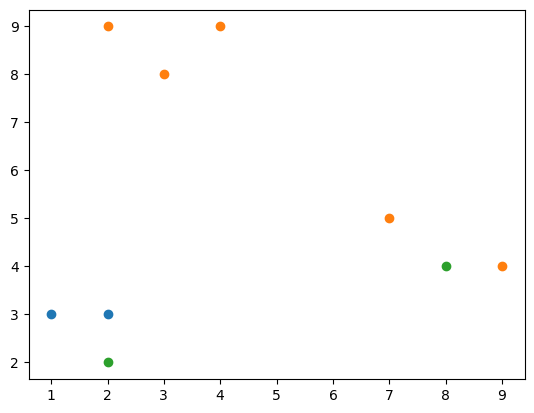

In [7]:
plt.scatter(a1[:,0],a1[:,1])
plt.scatter(b1[:,0],b1[:,1])
plt.scatter(c1[:,0],c1[:,1])
plt.show()

## Part 2/4:
#### Plot of custom dataset using implemented code

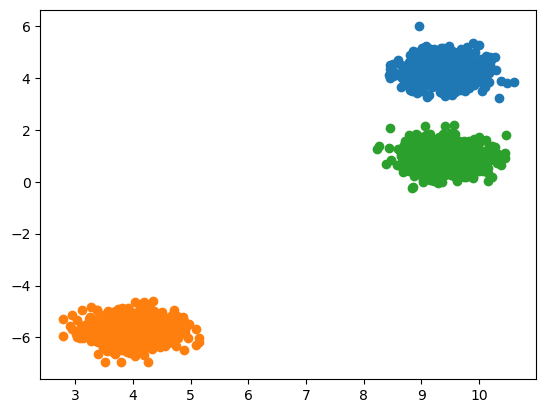

In [8]:
plt.scatter(a2[:,0],a2[:,1])
plt.scatter(b2[:,0],b2[:,1])
plt.scatter(c2[:,0],c2[:,1])
plt.show()

## Part 3/4:
#### Plot of iris dataset using implementated algorithm

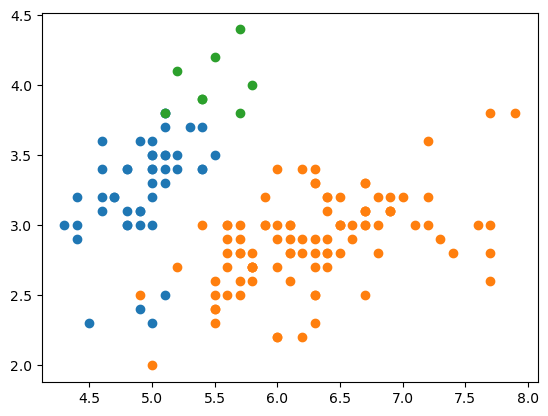

In [9]:
plt.scatter(a3[:,0],a3[:,1])
plt.scatter(b3[:,0],b3[:,1])
plt.scatter(c3[:,0],c3[:,1])
plt.show()

Observation:

The data seems as if it is somewhat seperated. Lets look at how well scikit can perform and compare our implemented model.

## Plot 4/4:
#### Plot of iris dataset using scikit Kmeans 

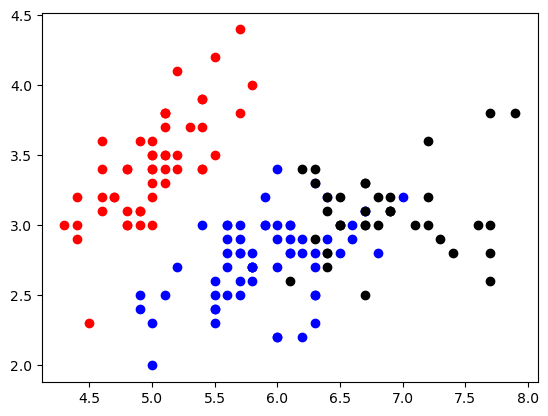

In [10]:
from sklearn.cluster import KMeans

df = iris.data
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(df)

label1 = df[label == 1]
label2 = df[label == 2]
label3 = df[label == 0]

#Plotting the results
plt.scatter(label1[:,0] , label1[:,1] , color = 'red')
plt.scatter(label2[:,0] , label2[:,1] , color = 'blue')
plt.scatter(label3[:,0] , label3[:,1] , color = 'black')
plt.show()

Observation of Plot 3/4 and Plot 4/4:

Both the plots look very similar. So we can conclude that the implemented algorithm is working as expected